# 2022 NZMSA Data Science Submission.

In [133]:
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

%matplotlib inline

# EDA

In [134]:
dataset = pd.read_csv("weather-data.csv")
#dataset.head() # Show the first five results.

In [135]:
'''
Display average, standard deviation and percentile range (25th and 75th).
'''
dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [136]:
# Display length and data types for the different columns in the dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


<AxesSubplot:>

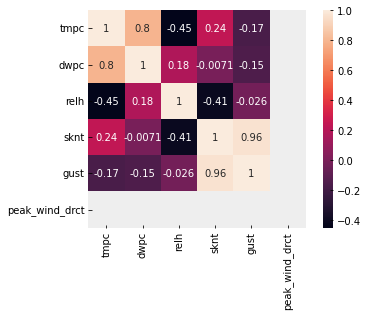

In [137]:
# Correlation Plot
sns.heatmap(dataset.corr(), annot=True, square=True)

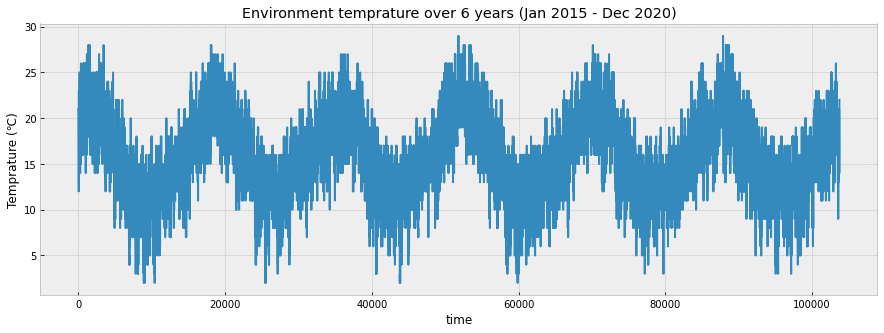

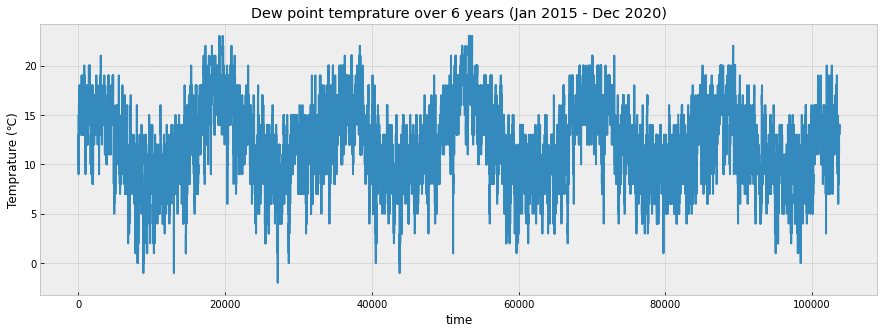

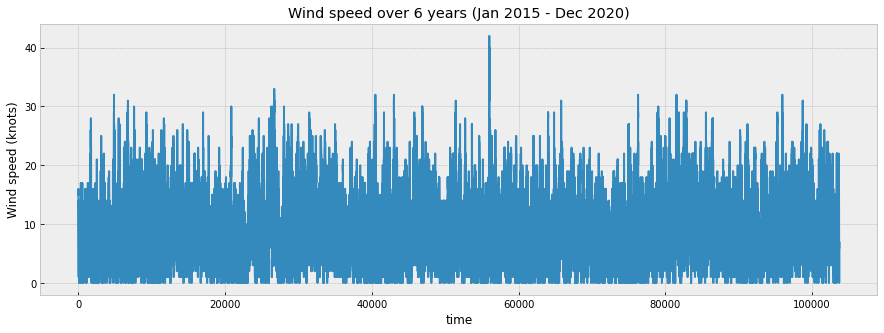

In [138]:
## Temprature vs time Graph
# Plot style and sizing
plt.style.use("bmh")
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

# Setting up plot for temprature data over time
plt.plot(dataset['tmpc'])
plt.title('Environment temprature over 6 years (Jan 2015 - Dec 2020)')
plt.xlabel('time')
plt.ylabel('Temprature (℃)')
# Show plot
plt.show()

## Dew point temprature vs time graph
# Plot style and sizing
plt.style.use("bmh")
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

# Setting up plot for dew point temprature data over time
plt.plot(dataset['dwpc'])
plt.title('Dew point temprature over 6 years (Jan 2015 - Dec 2020)')
plt.xlabel('time')
plt.ylabel('Temprature (℃)')
# Show plot
plt.show()

## Wind speed vs time graph
# Plot style and sizing
plt.style.use("bmh")
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

# Setting up plot for dew point temprature data over time
plt.plot(dataset['sknt'])
plt.title('Wind speed over 6 years (Jan 2015 - Dec 2020)')
plt.xlabel('time')
plt.ylabel('Wind speed (knots)')
# Show plot
plt.show()

## Comments on the dataset after performing EDA
* Data is quite big and needs a big plot to accuratly plot all data points. Thinning down the data by considering data collected every midnight and making graph wider has helped solve this.
* The correlation plot (sns heatmap) indicates a strong relationship between environment temprature and environment dew point temprature.
* The numerical section plots display proportionality between environment temprature and environment dew point temprature. Evident by the similar sinusoidal wave pattern in both plots.
* tmpc, dwpc, relh, sknt, gust and peak_wind_drct columns have missing data. Indicated by .isnull().any() method performed on dataset

# Data Processing

In [139]:
# Create dataset copy
updt_dataset = dataset.copy()

# delete unwanted data to save reduce complexity and save compute time
updt_dataset = updt_dataset.drop(columns=[' station', 'dwpc', 'relh', 'sknt', 'gust', 'peak_wind_drct'], axis=1)

In [140]:
# Check for missing data (will show True if any)
updt_dataset.isnull().any()


valid    False
tmpc      True
dtype: bool

In [141]:
# replacing missing values with mean of column
updt_dataset = updt_dataset.fillna(updt_dataset.mean())
updt_dataset.isnull().any()

/var/folders/7p/v346b07n3fs931hlm_yg82mw0000gn/T/ipykernel_96790/40521085.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  updt_dataset = updt_dataset.fillna(updt_dataset.mean())


valid    False
tmpc     False
dtype: bool

In [142]:
# Create X data with numeric values as current valid data column is of datetime type
x = [x for x in range(len(updt_dataset['valid']))]
x = pd.DataFrame(x)
#print (x, updt_dataset['tmpc'])
#print (len(x), updt_dataset['tmpc'].shape)


In [143]:
'''
Splitting data into train and test sets
    - using shuffle=False to make it easier to seperate last month as a test set
    - test_size = 0.01389 as 1 month in 72 months (6 years)
'''
x_train, x_test, y_train, y_test = train_test_split(x, updt_dataset['tmpc'], test_size=0.2, random_state=10, shuffle=False)

# Data Modelling

In [144]:
# Using selected model to fit data
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

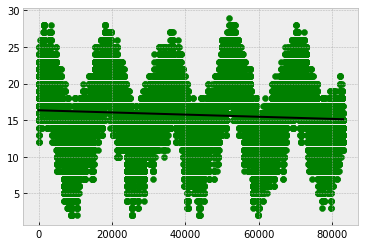

In [145]:
# Visualising model fit on training data
plt.scatter(x_train, y_train, color='g')
plt.plot(x_train, model.predict(x_train), color='k')
plt.show()

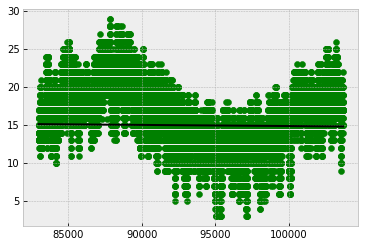

R-squared: -0.06152716125868518


In [146]:
# Visualising model fit on test data
plt.scatter(x_test, y_test, color='g')
plt.plot(x_test, model.predict(x_test), color='k')
plt.show()

# Score test data
score = model.score(x_test, y_test)
print("R-squared:", score)

In [147]:
'''
Create test set for January 2021 (31 days)
    - last x value from dataset = 103713. x_test would range from 
        103713 to 105201 (103713 + 31days*24hours*2(for number of half hours in a month)
'''
x_future_test = [x for x in range(103713, 105201 + 1)]
x_future_test = pd.DataFrame(x_test)

In [148]:
# Predict temprature for future month (2021 Jan)
#score = model.score(x_test, model.predict(x_test))
#print("R-squared:", score)
model.predict(x_test)

array([15.13821759, 15.13820289, 15.13818818, ..., 14.8332558 ,
       14.83324109, 14.83322639])

# Model Evalutation


# Conclusion
* In future, will need find a better model to fit the data.
## Model Performance
* Model underfit the training data. This is evident looking at the visual graph.

## Observations
* Test score was very low. Indicated by the low r squared value.
* Low test score would mean the future predictions from the model would be unrealiable.